In [1]:
class KMeans:
    def __init__(self, n_clusters, max_iter=100, min_change=0.01):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.labels = None
      
    def get_centroids(self):
        return self.centroids
    
    def get_labels(self):
        return self.labels
    
    @staticmethod
    def __euclidean_distance(p1,p2):
        import math
        return math.sqrt(sum([(a - b) ** 2 for a, b in zip(p1, p2)]))
    
    def fit_predict(self, X):
        import random
        # generating random centroids
        rnd_idxs = random.sample(range(0, len(X)), self.n_clusters)
        self.centroids = [X[i] for i in rnd_idxs]
        # initializing labels to -1
        self.labels = np.full(len(X), -1)
        new_labels = np.full(len(X), -1)
        
        #  if less then min_changed_labels change label, stop the iterations
        min_changed_labels = min_change*len(X)
        curr_iter = 1
        
        while curr_iter <= self.max_iter:
            for i in range(len(X)):
                distances = [self.__euclidean_distance(X[i], self.centroids[j]) for j in range(len(self.centroids))]
                new_labels[i] = np.argmin(distances)
            for i in range(self.n_clusters):
                label_points = np.array([X[j] for j in range(len(X)) if new_labels[j] == i])
                self.centroids[i] = [np.mean(label_points[:,0]), np.mean(label_points[:,1])]
            
            changed_labels = sum([1 for i in range(len(new_labels)) if new_labels[i] != self.labels[i]])
            self.labels = new_labels
            if(changed_labels <= min_changed_labels):
                break
            curr_iter += 1
    
    def dump_to_file(self, filename):
        import csv
        with open(filename, mode='w') as f:
            f_writer = csv.writer(f, delimiter=',', quoting=csv.QUOTE_MINIMAL)
            f_writer.writerow(["Id", "ClusterId"])
            for i in range(len(self.labels)):
                f_writer.writerow([i, self.labels[i]])
        

In [2]:
import numpy as np

def euclidean_distance(p1,p2):
    import math
    return math.sqrt(sum([(a - b) ** 2 for a, b in zip(p1, p2)]))
    
def silhouette_samples(X, labels, distances_matrix = []):
    
    def distance(i,j):
        if i > j:
            return distances_matrix[j][i]
        else:
            return distances_matrix[i][j]
        
    
    def dissim_same_cluster(index):
        cluster = labels[index]
        same_cluster_objs = [i for i in range(len(X)) if labels[i] == cluster and i != index]
        return np.mean([distance(index, same_cluster_objs[i]) for i in range(len(same_cluster_objs))])
        
    def dissim_other_clusters(index):
        obj_cluster = labels[index]
        clusters = set(labels)
        avg_dissim = []
        for cluster in clusters:
            if cluster != obj_cluster:
                cluster_objs = [i for i in range(len(X)) if labels[i] == cluster]
                avg_dissim.append(np.mean([distance(index,cluster_objs[i]) for i in range(len(cluster_objs))]))
        return min(avg_dissim)

    
    def silhouette(index):
        a = dissim_same_cluster(index)
        b = dissim_other_clusters(index)
        return (b-a)/max(a,b)
        
    if distances_matrix == []:
        for i in range(len(X)):
            dist = [0 for j in range (i+1)]
            dist += [euclidean_distance(X[i],X[j]) for j in range(i+1, len(X))]
            distances_matrix.append(dist)
    
    return [silhouette(i) for i in range(len(X))]
        
    

def silhouette_score(X, labels, distances_matrix = []):
    return np.mean(silhouette_samples(X,labels, distances_matrix))

In [3]:
data = {}
data["gauss"] = np.loadtxt("2D_gauss_clusters.txt", skiprows = 1, delimiter = ',')  
data["chameleon"] = np.loadtxt("chameleon_clusters.txt", skiprows = 1, delimiter = ',')  

n_clusters_gauss = 15
n_clusters_chameleon = 6
max_iter = 100
min_change = 0.01    

In [120]:
k_means_operator_gauss = KMeans(n_clusters_gauss, max_iter, min_change)
k_means_operator_gauss.fit_predict(data["gauss"])
labels_gauss =  k_means_operator_gauss.get_labels()

In [138]:
k_means_operator_cham = KMeans(n_clusters_chameleon, max_iter, min_change)
k_means_operator_cham.fit_predict(data["chameleon"])
labels_chameleon =  k_means_operator_cham.get_labels()

In [4]:
distances_matrix_gauss = []
for i in range(len(data["gauss"])):
    dist = [0 for j in range(i+1)]
    dist += [euclidean_distance(data["gauss"][i],data["gauss"][j]) for j in range(i+1, len(data["gauss"]))]
    distances_matrix_gauss.append(dist)

In [140]:
distances_matrix_chameleon = []
for i in range(len(data["chameleon"])):
    dist = [0 for j in range(i+1)]
    dist += [euclidean_distance(data["chameleon"][i],data["chameleon"][j]) for j in range(i+1, len(data["chameleon"]))]
    distances_matrix_chameleon.append(dist)  

In [142]:
sscore_gauss = silhouette_score(data["gauss"], labels_gauss, distances_matrix_gauss)
sscore_chameleon = silhouette_score(data["chameleon"], labels_chameleon, distances_matrix_chameleon)

Object [845753. 636607.] at index 0
Object [812954. 643720.] at index 1
Object [868217. 609046.] at index 2
Object [920248. 607272.] at index 3
Object [841621. 639394.] at index 4
Object [843907. 598777.] at index 5
Object [817712. 620917.] at index 6
Object [865980. 632292.] at index 7
Object [876539. 639944.] at index 8
Object [805247. 642901.] at index 9
Object [829227. 565484.] at index 10
Object [834679. 669557.] at index 11
Object [851242. 630615.] at index 12
Object [890325. 702688.] at index 13
Object [832159. 638667.] at index 14
Object [833736. 637738.] at index 15
Object [778784. 571492.] at index 16
Object [844489. 672382.] at index 17
Object [825802. 638894.] at index 18
Object [875471. 622426.] at index 19
Object [879225. 639387.] at index 20
Object [819482. 633447.] at index 21
Object [818212. 633262.] at index 22
Object [839324. 651033.] at index 23
Object [817439. 678071.] at index 24
Object [876202. 600942.] at index 25
Object [841025. 623927.] at index 26
Object [850

Object [918549. 595580.] at index 220
Object [873325. 661718.] at index 221
Object [836224. 622436.] at index 222
Object [881118. 595784.] at index 223
Object [854502. 597915.] at index 224
Object [877342. 656313.] at index 225
Object [849343. 644126.] at index 226
Object [796153. 621598.] at index 227
Object [806313. 641996.] at index 228
Object [847671. 637692.] at index 229
Object [869123. 660870.] at index 230
Object [848927. 645583.] at index 231
Object [800992. 654397.] at index 232
Object [877837. 634860.] at index 233
Object [836202. 600653.] at index 234
Object [803719. 688801.] at index 235
Object [812864. 648497.] at index 236
Object [871038. 632419.] at index 237
Object [848660. 637062.] at index 238
Object [870340. 608506.] at index 239
Object [839706. 604004.] at index 240
Object [773106. 587731.] at index 241
Object [838636. 638170.] at index 242
Object [833424. 637495.] at index 243
Object [803393. 632114.] at index 244
Object [806771. 696582.] at index 245
Object [8374

Object [515463. 270311.] at index 436
Object [545539. 195363.] at index 437
Object [590449. 254253.] at index 438
Object [570787. 246876.] at index 439
Object [628713. 228930.] at index 440
Object [556580. 229133.] at index 441
Object [593632. 266999.] at index 442
Object [526382. 240215.] at index 443
Object [461510. 212553.] at index 444
Object [550952. 216322.] at index 445
Object [644419. 196985.] at index 446
Object [655814. 200692.] at index 447
Object [576564. 168998.] at index 448
Object [568570. 254388.] at index 449
Object [544728. 151536.] at index 450
Object [552544. 258173.] at index 451
Object [582510. 232791.] at index 452
Object [576350. 289752.] at index 453
Object [595209. 248589.] at index 454
Object [567870. 284151.] at index 455
Object [509669. 309353.] at index 456
Object [557305. 245969.] at index 457
Object [543639. 242836.] at index 458
Object [582187. 245841.] at index 459
Object [561214. 239273.] at index 460
Object [603094. 315792.] at index 461
Object [5723

Object [255886. 727572.] at index 661
Object [315723. 708334.] at index 662
Object [234688. 718141.] at index 663
Object [205548. 820577.] at index 664
Object [210438. 672028.] at index 665
Object [268715. 766646.] at index 666
Object [212151. 726042.] at index 667
Object [299298. 716848.] at index 668
Object [391506. 745793.] at index 669
Object [265410. 761230.] at index 670
Object [380778. 761351.] at index 671
Object [301915. 642007.] at index 672
Object [288109. 751211.] at index 673
Object [221650. 852250.] at index 674
Object [203861. 729571.] at index 675
Object [258191. 719517.] at index 676
Object [276360. 722572.] at index 677
Object [250153. 705149.] at index 678
Object [225440. 777239.] at index 679
Object [263300. 708862.] at index 680
Object [209638. 779903.] at index 681
Object [265687. 728957.] at index 682
Object [219148. 671608.] at index 683
Object [202313. 803556.] at index 684
Object [260246. 744148.] at index 685
Object [353731. 733108.] at index 686
Object [3618

Object [265486. 702190.] at index 886
Object [260419. 741212.] at index 887
Object [309129. 744956.] at index 888
Object [331240. 717418.] at index 889
Object [226170. 738339.] at index 890
Object [190767. 706219.] at index 891
Object [264262. 737376.] at index 892
Object [318816. 748314.] at index 893
Object [403394. 777748.] at index 894
Object [133737. 819023.] at index 895
Object [262522. 730690.] at index 896
Object [322898. 707331.] at index 897
Object [267179. 761430.] at index 898
Object [309043. 753241.] at index 899
Object [240893. 734383.] at index 900
Object [259566. 727891.] at index 901
Object [274552. 718547.] at index 902
Object [281005. 717468.] at index 903
Object [249734. 767527.] at index 904
Object [285301. 711712.] at index 905
Object [269005. 750467.] at index 906
Object [155283. 721118.] at index 907
Object [276869. 731039.] at index 908
Object [267975. 745703.] at index 909
Object [230459. 815042.] at index 910
Object [235700. 742331.] at index 911
Object [2845

Object [560500. 439267.] at index 1099
Object [490871. 511719.] at index 1100
Object [528328. 432436.] at index 1101
Object [565144. 416025.] at index 1102
Object [525461. 390918.] at index 1103
Object [546371. 432422.] at index 1104
Object [538782. 473082.] at index 1105
Object [611712. 395925.] at index 1106
Object [484168. 387405.] at index 1107
Object [551526. 457442.] at index 1108
Object [489505. 420072.] at index 1109
Object [600738. 463163.] at index 1110
Object [589889. 475739.] at index 1111
Object [514225. 536816.] at index 1112
Object [578615. 447581.] at index 1113
Object [553817. 402394.] at index 1114
Object [461670. 393552.] at index 1115
Object [597719. 429710.] at index 1116
Object [505651. 444909.] at index 1117
Object [516034. 402424.] at index 1118
Object [546287. 438245.] at index 1119
Object [596539. 376915.] at index 1120
Object [554524. 405520.] at index 1121
Object [568522. 412767.] at index 1122
Object [589979. 394610.] at index 1123
Object [517816. 430769.] 

Object [786819. 217596.] at index 1317
Object [724693. 300946.] at index 1318
Object [802289. 237945.] at index 1319
Object [745416. 198118.] at index 1320
Object [805167. 195569.] at index 1321
Object [804876. 233484.] at index 1322
Object [811122. 234227.] at index 1323
Object [746115. 174758.] at index 1324
Object [808918. 240673.] at index 1325
Object [783113. 249571.] at index 1326
Object [779407. 216656.] at index 1327
Object [795765. 205593.] at index 1328
Object [808909. 244561.] at index 1329
Object [793721. 273544.] at index 1330
Object [838678. 285533.] at index 1331
Object [816382. 241539.] at index 1332
Object [762228. 170036.] at index 1333
Object [785728. 198547.] at index 1334
Object [831392. 233281.] at index 1335
Object [852354. 351771.] at index 1336
Object [754394. 188386.] at index 1337
Object [833141. 244991.] at index 1338
Object [813108. 245893.] at index 1339
Object [796846. 214589.] at index 1340
Object [809373. 167754.] at index 1341
Object [766881. 246119.] 

Object [775576. 214729.] at index 1534
Object [762220. 201489.] at index 1535
Object [787634. 208637.] at index 1536
Object [837705. 183892.] at index 1537
Object [743486. 210190.] at index 1538
Object [833976. 214186.] at index 1539
Object [750510. 324130.] at index 1540
Object [812921. 256262.] at index 1541
Object [874372. 191594.] at index 1542
Object [868167. 228347.] at index 1543
Object [815605. 239519.] at index 1544
Object [836059. 221012.] at index 1545
Object [856835. 289341.] at index 1546
Object [823141. 203497.] at index 1547
Object [806678. 241501.] at index 1548
Object [759976. 283246.] at index 1549
Object [803022. 245592.] at index 1550
Object [765715. 281157.] at index 1551
Object [823326. 281490.] at index 1552
Object [808523. 242120.] at index 1553
Object [808833. 241692.] at index 1554
Object [810615. 244983.] at index 1555
Object [834180. 195070.] at index 1556
Object [804550. 222538.] at index 1557
Object [809651. 243502.] at index 1558
Object [833713. 231141.] 

Object [423351. 683613.] at index 1752
Object [451508. 619873.] at index 1753
Object [458908. 601967.] at index 1754
Object [447797. 546020.] at index 1755
Object [431542. 625990.] at index 1756
Object [422092. 641107.] at index 1757
Object [447028. 613881.] at index 1758
Object [450049. 619865.] at index 1759
Object [447016. 561170.] at index 1760
Object [448043. 593794.] at index 1761
Object [439602. 621588.] at index 1762
Object [448315. 608918.] at index 1763
Object [435287. 618215.] at index 1764
Object [457799. 531754.] at index 1765
Object [449352. 662964.] at index 1766
Object [448601. 619650.] at index 1767
Object [426524. 626797.] at index 1768
Object [432586. 619808.] at index 1769
Object [445966. 677989.] at index 1770
Object [443815. 614792.] at index 1771
Object [434851. 666009.] at index 1772
Object [454453. 601665.] at index 1773
Object [453894. 590031.] at index 1774
Object [452896. 612311.] at index 1775
Object [430612. 606441.] at index 1776
Object [455847. 628630.] 

Object [756304. 489736.] at index 1971
Object [789720. 518559.] at index 1972
Object [745921. 565171.] at index 1973
Object [746925. 503747.] at index 1974
Object [775990. 473484.] at index 1975
Object [757951. 459274.] at index 1976
Object [717757. 502933.] at index 1977
Object [739644. 492615.] at index 1978
Object [685813. 420491.] at index 1979
Object [749620. 446114.] at index 1980
Object [751490. 503108.] at index 1981
Object [780624. 523562.] at index 1982
Object [764556. 501749.] at index 1983
Object [714111. 509663.] at index 1984
Object [651301. 477080.] at index 1985
Object [748808. 506234.] at index 1986
Object [743071. 496017.] at index 1987
Object [839170. 510675.] at index 1988
Object [737277. 494037.] at index 1989
Object [730517. 494716.] at index 1990
Object [781105. 493570.] at index 1991
Object [723443. 496326.] at index 1992
Object [727728. 486854.] at index 1993
Object [738050. 503128.] at index 1994
Object [751827. 506545.] at index 1995
Object [744128. 491509.] 

Object [759501. 501657.] at index 2189
Object [788686. 475140.] at index 2190
Object [707047. 411898.] at index 2191
Object [759900. 480354.] at index 2192
Object [721240. 488869.] at index 2193
Object [749909. 495121.] at index 2194
Object [731573. 423211.] at index 2195
Object [735690. 487883.] at index 2196
Object [736447. 495116.] at index 2197
Object [736840. 480400.] at index 2198
Object [766906. 565918.] at index 2199
Object [777336. 493593.] at index 2200
Object [742956. 482214.] at index 2201
Object [691442. 511116.] at index 2202
Object [676995. 476288.] at index 2203
Object [737776. 506695.] at index 2204
Object [737775. 515859.] at index 2205
Object [746789. 484134.] at index 2206
Object [702306. 508607.] at index 2207
Object [700190. 518411.] at index 2208
Object [734587. 494087.] at index 2209
Object [738362. 540660.] at index 2210
Object [743423. 497525.] at index 2211
Object [681136. 488487.] at index 2212
Object [791228. 500692.] at index 2213
Object [745226. 489261.] 

Object [836616. 812262.] at index 2404
Object [808701. 800100.] at index 2405
Object [806309. 805747.] at index 2406
Object [807546. 803599.] at index 2407
Object [812855. 795781.] at index 2408
Object [832359. 781195.] at index 2409
Object [808459. 797917.] at index 2410
Object [844453. 807177.] at index 2411
Object [795810. 797565.] at index 2412
Object [812775. 800227.] at index 2413
Object [833218. 782008.] at index 2414
Object [902127. 790356.] at index 2415
Object [851161. 798515.] at index 2416
Object [834253. 806535.] at index 2417
Object [810198. 799363.] at index 2418
Object [805723. 788560.] at index 2419
Object [818972. 795586.] at index 2420
Object [786133. 824977.] at index 2421
Object [871946. 767622.] at index 2422
Object [780537. 795247.] at index 2423
Object [788649. 794537.] at index 2424
Object [812179. 799484.] at index 2425
Object [819533. 799169.] at index 2426
Object [810233. 797993.] at index 2427
Object [772515. 835615.] at index 2428
Object [807776. 793655.] 

Object [634532. 716093.] at index 2622
Object [634214. 708358.] at index 2623
Object [628856. 751488.] at index 2624
Object [705772. 693959.] at index 2625
Object [638982. 719285.] at index 2626
Object [587652. 724621.] at index 2627
Object [643835. 717689.] at index 2628
Object [642061. 703080.] at index 2629
Object [680868. 731424.] at index 2630
Object [647974. 734779.] at index 2631
Object [592707. 669467.] at index 2632
Object [659403. 713194.] at index 2633
Object [651363. 677982.] at index 2634
Object [614618. 734345.] at index 2635
Object [644438. 720614.] at index 2636
Object [625398. 783528.] at index 2637
Object [623234. 700831.] at index 2638
Object [589875. 662805.] at index 2639
Object [636688. 682078.] at index 2640
Object [649471. 717081.] at index 2641
Object [619595. 706496.] at index 2642
Object [639029. 714515.] at index 2643
Object [624252. 713773.] at index 2644
Object [644538. 719707.] at index 2645
Object [634803. 719010.] at index 2646
Object [640350. 716486.] 

Object [591266. 693611.] at index 2835
Object [644299. 720467.] at index 2836
Object [695676. 689657.] at index 2837
Object [719566. 732237.] at index 2838
Object [643481. 712387.] at index 2839
Object [621553. 724972.] at index 2840
Object [675171. 644567.] at index 2841
Object [642088. 717688.] at index 2842
Object [631286. 738866.] at index 2843
Object [598179. 722745.] at index 2844
Object [661574. 646984.] at index 2845
Object [597177. 721927.] at index 2846
Object [638644. 718384.] at index 2847
Object [675532. 657020.] at index 2848
Object [637237. 710890.] at index 2849
Object [627082. 747118.] at index 2850
Object [641684. 622495.] at index 2851
Object [610549. 787508.] at index 2852
Object [692090. 719344.] at index 2853
Object [594137. 703143.] at index 2854
Object [635109. 757188.] at index 2855
Object [635261. 760734.] at index 2856
Object [639214. 723166.] at index 2857
Object [657024. 681096.] at index 2858
Object [632584. 729817.] at index 2859
Object [575738. 712438.] 

Object [367982. 393206.] at index 3046
Object [364036. 409097.] at index 3047
Object [344531. 365263.] at index 3048
Object [357000. 421753.] at index 3049
Object [369441. 392952.] at index 3050
Object [489693. 353205.] at index 3051
Object [367173. 393741.] at index 3052
Object [442860. 361976.] at index 3053
Object [433651. 314903.] at index 3054
Object [367478. 393206.] at index 3055
Object [369993. 409013.] at index 3056
Object [343270. 362023.] at index 3057
Object [358829. 388192.] at index 3058
Object [280484. 412725.] at index 3059
Object [379667. 374359.] at index 3060
Object [351611. 456804.] at index 3061
Object [348503. 388328.] at index 3062
Object [421443. 415243.] at index 3063
Object [378071. 376634.] at index 3064
Object [357600. 357844.] at index 3065
Object [456365. 378763.] at index 3066
Object [313559. 440588.] at index 3067
Object [368047. 442140.] at index 3068
Object [362095. 375130.] at index 3069
Object [411435. 350026.] at index 3070
Object [382507. 407790.] 

Object [148601. 267824.] at index 3258
Object [150396. 243417.] at index 3259
Object [ 75053. 198882.] at index 3260
Object [160715. 202648.] at index 3261
Object [149811. 261597.] at index 3262
Object [137141. 205921.] at index 3263
Object [179778. 277955.] at index 3264
Object [165119. 242674.] at index 3265
Object [135664. 249619.] at index 3266
Object [157148. 244335.] at index 3267
Object [150545. 140302.] at index 3268
Object [172609. 209554.] at index 3269
Object [141123. 227935.] at index 3270
Object [177806. 154620.] at index 3271
Object [ 96693. 226847.] at index 3272
Object [159801. 255188.] at index 3273
Object [158279. 306457.] at index 3274
Object [106594. 298013.] at index 3275
Object [164852. 249505.] at index 3276
Object [178416. 232560.] at index 3277
Object [157237. 214768.] at index 3278
Object [119152. 233480.] at index 3279
Object [150318. 246184.] at index 3280
Object [150718. 240605.] at index 3281
Object [119669. 227422.] at index 3282
Object [112325. 286166.] 

Object [161407. 246483.] at index 3473
Object [206830. 228445.] at index 3474
Object [152402. 233954.] at index 3475
Object [140787. 235320.] at index 3476
Object [117830. 176866.] at index 3477
Object [129627. 230607.] at index 3478
Object [197192. 249867.] at index 3479
Object [141613. 249308.] at index 3480
Object [181453. 220148.] at index 3481
Object [144536. 253350.] at index 3482
Object [161938. 250969.] at index 3483
Object [112734. 194495.] at index 3484
Object [177061. 241238.] at index 3485
Object [140450. 251264.] at index 3486
Object [156436. 244401.] at index 3487
Object [118868. 263809.] at index 3488
Object [166469. 246603.] at index 3489
Object [179324. 260539.] at index 3490
Object [146316. 205253.] at index 3491
Object [160154. 250907.] at index 3492
Object [160139. 234540.] at index 3493
Object [130096. 194244.] at index 3494
Object [143466. 232632.] at index 3495
Object [136755. 258715.] at index 3496
Object [108243. 264050.] at index 3497
Object [156705. 234233.] 

Object [336851. 155364.] at index 3690
Object [391415. 152720.] at index 3691
Object [371094. 153053.] at index 3692
Object [522544. 137289.] at index 3693
Object [407582. 202582.] at index 3694
Object [436631. 230033.] at index 3695
Object [435566. 231374.] at index 3696
Object [435061. 194635.] at index 3697
Object [398527. 261527.] at index 3698
Object [427239. 152272.] at index 3699
Object [371277. 155889.] at index 3700
Object [383801. 170340.] at index 3701
Object [347681. 289055.] at index 3702
Object [448694.  47368.] at index 3703
Object [421379. 160869.] at index 3704
Object [385673. 169869.] at index 3705
Object [422831. 251615.] at index 3706
Object [416238. 192639.] at index 3707
Object [379165. 260170.] at index 3708
Object [341606. 259863.] at index 3709
Object [330988.  86975.] at index 3710
Object [320580. 219080.] at index 3711
Object [333078. 148391.] at index 3712
Object [289908. 149141.] at index 3713
Object [366903. 161264.] at index 3714
Object [384297. 171363.] 

Object [416489.  50189.] at index 3909
Object [424799. 231862.] at index 3910
Object [428477. 165087.] at index 3911
Object [456038.  93573.] at index 3912
Object [395332. 111806.] at index 3913
Object [383852. 170166.] at index 3914
Object [370610. 147161.] at index 3915
Object [285347. 153194.] at index 3916
Object [378828. 190396.] at index 3917
Object [419201. 104680.] at index 3918
Object [381125. 170852.] at index 3919
Object [481461. 203506.] at index 3920
Object [431201. 111664.] at index 3921
Object [335392. 229987.] at index 3922
Object [410952. 118990.] at index 3923
Object [325737. 254683.] at index 3924
Object [331642. 165854.] at index 3925
Object [300459. 113094.] at index 3926
Object [387961. 167666.] at index 3927
Object [356742. 225013.] at index 3928
Object [381730. 145451.] at index 3929
Object [377484. 175687.] at index 3930
Object [400677. 223791.] at index 3931
Object [393882. 239136.] at index 3932
Object [399358. 171270.] at index 3933
Object [405210. 133109.] 

Object [140606. 419729.] at index 4131
Object [214112. 548157.] at index 4132
Object [193996. 488095.] at index 4133
Object [189760. 444553.] at index 4134
Object [172246. 511422.] at index 4135
Object [140454. 557008.] at index 4136
Object [229232. 564886.] at index 4137
Object [163899. 505525.] at index 4138
Object [204501. 486492.] at index 4139
Object [149313. 408879.] at index 4140
Object [158148. 499972.] at index 4141
Object [107935. 451945.] at index 4142
Object [154221. 438519.] at index 4143
Object [170432. 511098.] at index 4144
Object [150652. 432587.] at index 4145
Object [200360. 480447.] at index 4146
Object [234007. 516904.] at index 4147
Object [188695. 514970.] at index 4148
Object [203490. 442567.] at index 4149
Object [174153. 442752.] at index 4150
Object [199381. 476054.] at index 4151
Object [203633. 447281.] at index 4152
Object [175493. 482614.] at index 4153
Object [ 99813. 428022.] at index 4154
Object [163423. 383935.] at index 4155
Object [200013. 481618.] 

Object [508569. 826431.] at index 4349
Object [499171. 853840.] at index 4350
Object [476609. 896330.] at index 4351
Object [462641. 873096.] at index 4352
Object [496157. 858363.] at index 4353
Object [587164. 934503.] at index 4354
Object [514518. 840298.] at index 4355
Object [490690. 758774.] at index 4356
Object [529301. 777124.] at index 4357
Object [431603. 825661.] at index 4358
Object [572003. 759509.] at index 4359
Object [521636. 832236.] at index 4360
Object [528492. 823480.] at index 4361
Object [495917. 815492.] at index 4362
Object [477106. 823495.] at index 4363
Object [505263. 858709.] at index 4364
Object [479632. 713435.] at index 4365
Object [469430. 847522.] at index 4366
Object [505676. 855482.] at index 4367
Object [562175. 850937.] at index 4368
Object [522504. 796625.] at index 4369
Object [525795. 842177.] at index 4370
Object [508059. 874463.] at index 4371
Object [473545. 896739.] at index 4372
Object [434368. 826882.] at index 4373
Object [521395. 853079.] 

Object [501370. 864849.] at index 4568
Object [440078. 833239.] at index 4569
Object [593226. 781983.] at index 4570
Object [471182. 869337.] at index 4571
Object [496356. 803174.] at index 4572
Object [506451. 847498.] at index 4573
Object [433464. 883410.] at index 4574
Object [481888. 893156.] at index 4575
Object [555325. 838425.] at index 4576
Object [441043. 876786.] at index 4577
Object [506361. 849295.] at index 4578
Object [575185. 935592.] at index 4579
Object [510223. 792220.] at index 4580
Object [506392. 848910.] at index 4581
Object [564834. 780899.] at index 4582
Object [589897. 941206.] at index 4583
Object [482586. 843438.] at index 4584
Object [481076. 829392.] at index 4585
Object [538191. 932212.] at index 4586
Object [395369. 828639.] at index 4587
Object [496032. 926742.] at index 4588
Object [481474. 871803.] at index 4589
Object [556221. 913466.] at index 4590
Object [511941. 853424.] at index 4591
Object [571258. 821716.] at index 4592
Object [493898. 844618.] 

Object [680500. 157953.] at index 4782
Object [682074. 108238.] at index 4783
Object [668586. 177296.] at index 4784
Object [607280. 179752.] at index 4785
Object [683552. 118463.] at index 4786
Object [766989. 210310.] at index 4787
Object [706391. 175549.] at index 4788
Object [719865. 202142.] at index 4789
Object [677886. 155892.] at index 4790
Object [672422. 131767.] at index 4791
Object [749844. 201341.] at index 4792
Object [667974. 175547.] at index 4793
Object [681850. 151037.] at index 4794
Object [693591. 139764.] at index 4795
Object [737036. 156973.] at index 4796
Object [687759. 129513.] at index 4797
Object [684521. 179726.] at index 4798
Object [683348. 177770.] at index 4799
Object [652325. 155140.] at index 4800
Object [712504. 156892.] at index 4801
Object [720773. 163609.] at index 4802
Object [687347. 148959.] at index 4803
Object [619265. 159786.] at index 4804
Object [615920. 193133.] at index 4805
Object [667678.  94631.] at index 4806
Object [664033. 142907.] 

Object [633450. 201336.] at index 4995
Object [662080.  25631.] at index 4996
Object [706472. 171207.] at index 4997
Object [659128. 142611.] at index 4998
Object [665898.  98088.] at index 4999
Object [ 68.601997 102.491997] at index 0
Object [454.665985 264.80899 ] at index 1
Object [101.283997 169.285995] at index 2
Object [372.61499  263.140991] at index 3
Object [300.989014  46.555   ] at index 4
Object [100.904999 205.776993] at index 5
Object [110.170998  55.647999] at index 6
Object [118.856003  47.445999] at index 7
Object [355.247009  76.431   ] at index 8
Object [276.085999 182.048004] at index 9
Object [143.376007 117.737999] at index 10
Object [204.207001 133.410004] at index 11
Object [ 78.260002 139.326996] at index 12
Object [158.722    211.529999] at index 13
Object [68.433998 59.125   ] at index 14
Object [407.505005 160.498001] at index 15
Object [416.434998 150.445999] at index 16
Object [507.549011 190.889008] at index 17
Object [149.841003 204.709   ] at index 18


Object [225.919006  79.082001] at index 190
Object [360.173004 211.240005] at index 191
Object [366.281006  58.452999] at index 192
Object [424.911011 136.615997] at index 193
Object [548.374023 145.423004] at index 194
Object [387.81601  113.753998] at index 195
Object [451.851013 273.096008] at index 196
Object [283.040985  48.144001] at index 197
Object [404.425995 257.584015] at index 198
Object [402.472992 220.733994] at index 199
Object [142.244003 231.229996] at index 200
Object [145.981003 227.061996] at index 201
Object [284.207001 264.682007] at index 202
Object [337.813995 257.343994] at index 203
Object [105.432999  51.442001] at index 204
Object [545.223999 225.050995] at index 205
Object [208.389999  75.332001] at index 206
Object [345.174011 203.871994] at index 207
Object [273.891998 219.988998] at index 208
Object [289.348999 173.746002] at index 209
Object [564.370972  89.732002] at index 210
Object [412.708008 116.077003] at index 211
Object [271.722992 132.408997] a

Object [383.213989 247.852997] at index 419
Object [259.765015 126.155998] at index 420
Object [419.657013  65.945   ] at index 421
Object [634.95697  52.854  ] at index 422
Object [431.48999  264.490997] at index 423
Object [406.997986 246.190002] at index 424
Object [277.989014 205.149994] at index 425
Object [630.380005 115.349998] at index 426
Object [554.848022  85.685997] at index 427
Object [ 66.374001 127.314003] at index 428
Object [344.822998  55.803001] at index 429
Object [412.153992  78.268997] at index 430
Object [330.069    281.016998] at index 431
Object [260.335999 178.317993] at index 432
Object [147.856003 264.792999] at index 433
Object [149.651001 152.238007] at index 434
Object [387.100006  50.096001] at index 435
Object [446.381989  85.061996] at index 436
Object [129.001007 275.303986] at index 437
Object [ 77.414001 158.490997] at index 438
Object [153.929993 126.665001] at index 439
Object [631.591003 312.364014] at index 440
Object [204.826996 270.390991] at 

Object [82.024002 94.299004] at index 617
Object [393.753998 156.300003] at index 618
Object [386.412994 207.781006] at index 619
Object [330.976013 247.005005] at index 620
Object [525.497009 303.834991] at index 621
Object [211.923996 296.119995] at index 622
Object [472.796997  65.192001] at index 623
Object [550.546997 256.924988] at index 624
Object [86.282997 66.420998] at index 625
Object [482.707001 274.638   ] at index 626
Object [322.53299   65.028999] at index 627
Object [ 84.397003 199.468002] at index 628
Object [323.148987  25.094   ] at index 629
Object [132.520996 198.968002] at index 630
Object [519.080994 192.126999] at index 631
Object [203.091003 178.294006] at index 632
Object [264.011993 247.957993] at index 633
Object [342.73999  280.429993] at index 634
Object [287.651001  69.626999] at index 635
Object [353.446991 109.286003] at index 636
Object [513.723022 166.886002] at index 637
Object [173.960999  83.422997] at index 638
Object [ 72.469002 113.908997] at in

Object [ 65.189003 194.559006] at index 1014
Object [265.601013 240.356003] at index 1015
Object [205.205994  50.705002] at index 1016
Object [72.793999 78.227997] at index 1017
Object [140.843994 137.300003] at index 1018
Object [190.787994  75.969002] at index 1019
Object [278.528015  81.328003] at index 1020
Object [517.685974 307.463013] at index 1021
Object [415.431    255.132004] at index 1022
Object [90.285004 88.481003] at index 1023
Object [283.963013 174.406998] at index 1024
Object [418.147003 122.464996] at index 1025
Object [410.947998 205.373001] at index 1026
Object [548.560974 176.337997] at index 1027
Object [39.835999 88.721001] at index 1028
Object [567.103027 216.972   ] at index 1029
Object [ 67.875    208.449005] at index 1030
Object [377.470001 212.735992] at index 1031
Object [211.216995 107.484001] at index 1032
Object [232.098007 257.044006] at index 1033
Object [570.518005 251.044006] at index 1034
Object [537.054016  99.599998] at index 1035
Object [492.8219

Object [284.377991 260.545013] at index 1234
Object [90.861    76.959999] at index 1235
Object [532.476013 107.514   ] at index 1236
Object [273.045013  47.541   ] at index 1237
Object [324.967987 252.936005] at index 1238
Object [561.515991 175.779007] at index 1239
Object [157.009995  61.278999] at index 1240
Object [337.386993  59.169998] at index 1241
Object [284.536987  64.367996] at index 1242
Object [107.119003  57.084   ] at index 1243
Object [131.908005 135.149994] at index 1244
Object [77.188004 84.619003] at index 1245
Object [430.903992 242.270004] at index 1246
Object [297.881989  48.990002] at index 1247
Object [399.959015 179.531006] at index 1248
Object [558.909973 207.597   ] at index 1249
Object [564.122009 131.072998] at index 1250
Object [144.938995 320.873993] at index 1251
Object [504.268005 166.813004] at index 1252
Object [225.386002 126.597   ] at index 1253
Object [268.321991 180.776993] at index 1254
Object [301.324005  50.778   ] at index 1255
Object [338.59

Object [176.794998 113.024002] at index 1420
Object [ 14.988    198.343002] at index 1421
Object [155.604996 110.012001] at index 1422
Object [529.335999  67.264999] at index 1423
Object [59.775002 81.049004] at index 1424
Object [444.042999 245.828995] at index 1425
Object [158.796005 139.455994] at index 1426
Object [168.304993  71.5     ] at index 1427
Object [552.679016 239.589996] at index 1428
Object [382.506989 197.737   ] at index 1429
Object [541.80603   85.978996] at index 1430
Object [505.688995 148.173996] at index 1431
Object [271.213989 143.772995] at index 1432
Object [68.168999 46.334999] at index 1433
Object [ 71.392998 193.794006] at index 1434
Object [574.635986  97.913002] at index 1435
Object [263.815002 252.401993] at index 1436
Object [133.899994 199.835999] at index 1437
Object [617.526978 138.712997] at index 1438
Object [553.258972 237.582001] at index 1439
Object [506.928986  79.713997] at index 1440
Object [211.548004  58.882999] at index 1441
Object [145.95

Object [260.235992 110.880997] at index 1658
Object [530.34198 169.987  ] at index 1659
Object [297.11499  288.229004] at index 1660
Object [237.050995 214.179001] at index 1661
Object [349.217987 209.705994] at index 1662
Object [479.484009 260.565002] at index 1663
Object [190.688004 111.018997] at index 1664
Object [240.964005 206.065994] at index 1665
Object [354.967987 133.863007] at index 1666
Object [569.724976 112.117996] at index 1667
Object [414.487    264.042999] at index 1668
Object [384.343994 172.798004] at index 1669
Object [202.397995 159.580002] at index 1670
Object [188.832993  89.129997] at index 1671
Object [278.858002 240.772995] at index 1672
Object [567.799011 117.748001] at index 1673
Object [356.40799  227.078995] at index 1674
Object [404.529999 269.213989] at index 1675
Object [37.630001 76.426003] at index 1676
Object [219.279007 273.066986] at index 1677
Object [459.175995 267.041992] at index 1678
Object [96.666    76.977997] at index 1679
Object [563.7639

Object [519.651001 189.987   ] at index 1860
Object [528.718994 159.160004] at index 1861
Object [138.819    199.264999] at index 1862
Object [499.272003  81.705002] at index 1863
Object [364.35199   91.741997] at index 1864
Object [522.937988 154.852005] at index 1865
Object [489.837006  53.763   ] at index 1866
Object [489.967987 273.561005] at index 1867
Object [477.34201   56.481998] at index 1868
Object [159.697006 133.667999] at index 1869
Object [457.240997 249.281006] at index 1870
Object [199.906998 111.697998] at index 1871
Object [439.925995 270.122986] at index 1872
Object [455.834015 123.393997] at index 1873
Object [295.515991  41.032001] at index 1874
Object [543.489014 160.225998] at index 1875
Object [134.910995 121.496002] at index 1876
Object [210.781006 205.964996] at index 1877
Object [545.664978 194.412994] at index 1878
Object [388.846985 130.345993] at index 1879
Object [357.765015  52.974998] at index 1880
Object [549.984985  50.756001] at index 1881
Object [20

Object [268.15799  135.669006] at index 2051
Object [539.328979 231.843002] at index 2052
Object [577.034973 239.757004] at index 2053
Object [544.726013  69.011002] at index 2054
Object [407.984985 111.352997] at index 2055
Object [608.942017 271.795013] at index 2056
Object [281.587006 215.419006] at index 2057
Object [327.238007  67.017998] at index 2058
Object [482.450012 254.498993] at index 2059
Object [356.188995 215.384995] at index 2060
Object [ 82.149002 120.168999] at index 2061
Object [529.254028 188.350998] at index 2062
Object [326.25     134.289001] at index 2063
Object [280.828003 149.690994] at index 2064
Object [497.606995 175.395996] at index 2065
Object [327.647003  79.268997] at index 2066
Object [100.094002 220.475006] at index 2067
Object [272.601013 202.274994] at index 2068
Object [550.224976 150.130997] at index 2069
Object [300.27301  287.614014] at index 2070
Object [457.334991 171.279007] at index 2071
Object [132.153    135.550995] at index 2072
Object [20

Object [179.632004 115.154999] at index 2263
Object [421.574005 265.445007] at index 2264
Object [425.917999 161.554993] at index 2265
Object [416.063995 127.543999] at index 2266
Object [525.450989 119.217003] at index 2267
Object [222.667007 173.388   ] at index 2268
Object [292.186005 141.080994] at index 2269
Object [392.203003 243.266006] at index 2270
Object [487.596985  69.254997] at index 2271
Object [83.013    58.655998] at index 2272
Object [491.622986 137.057007] at index 2273
Object [346.350006 275.971985] at index 2274
Object [416.949005 218.399002] at index 2275
Object [409.700012 181.718002] at index 2276
Object [261.760986 164.852005] at index 2277
Object [82.634003 99.610001] at index 2278
Object [377.188995 147.761993] at index 2279
Object [112.136002  52.578999] at index 2280
Object [ 43.344002 111.564003] at index 2281
Object [403.479004 172.815002] at index 2282
Object [573.106995 105.219002] at index 2283
Object [380.207001 263.605011] at index 2284
Object [229.66

Object [128.177002  77.605003] at index 2467
Object [163.201004 233.565002] at index 2468
Object [273.054993 262.613007] at index 2469
Object [609.017029 217.621002] at index 2470
Object [288.311005 135.414001] at index 2471
Object [287.924988 206.067993] at index 2472
Object [354.912994 265.627014] at index 2473
Object [383.562988  70.072998] at index 2474
Object [231.604004 259.828003] at index 2475
Object [197.134003  91.411003] at index 2476
Object [397.22699   61.549999] at index 2477
Object [489.429993  65.110001] at index 2478
Object [365.018005 269.721985] at index 2479
Object [498.256012  59.592999] at index 2480
Object [513.268982 144.639008] at index 2481
Object [516.580017 114.839996] at index 2482
Object [213.645004 164.352997] at index 2483
Object [510.186005 194.703003] at index 2484
Object [541.991028  86.694   ] at index 2485
Object [144.279007 228.796005] at index 2486
Object [516.106995  86.897003] at index 2487
Object [239.182007  80.820999] at index 2488
Object [34

Object [215.248993 127.669998] at index 2658
Object [488.554993  61.740002] at index 2659
Object [419.365997  59.696999] at index 2660
Object [353.544006 211.302002] at index 2661
Object [482.661987 145.675003] at index 2662
Object [199.917007  80.935997] at index 2663
Object [523.922974  77.454002] at index 2664
Object [329.117004  71.436996] at index 2665
Object [513.702026  95.480003] at index 2666
Object [159.679993 142.804993] at index 2667
Object [518.664001 193.098007] at index 2668
Object [409.197998 106.444   ] at index 2669
Object [548.383972  50.890999] at index 2670
Object [271.608002 260.467987] at index 2671
Object [269.643005 216.582993] at index 2672
Object [292.151001 254.130005] at index 2673
Object [318.402008 298.601013] at index 2674
Object [420.997009 275.247986] at index 2675
Object [412.819    105.233002] at index 2676
Object [387.799011 110.723999] at index 2677
Object [141.285004 242.108994] at index 2678
Object [204.664993 145.440994] at index 2679
Object [34

Object [503.598999 199.880005] at index 2878
Object [347.506989 249.276001] at index 2879
Object [133.556     68.637001] at index 2880
Object [380.89801   64.845001] at index 2881
Object [163.048004  70.641998] at index 2882
Object [141.766998  54.      ] at index 2883
Object [338.761993 278.298004] at index 2884
Object [397.731995 253.509003] at index 2885
Object [518.283997 152.488007] at index 2886
Object [137.432999 126.93    ] at index 2887
Object [519.276978 124.668999] at index 2888
Object [164.119003 106.125   ] at index 2889
Object [513.460022 195.240005] at index 2890
Object [491.352997 156.688995] at index 2891
Object [284.231995 267.368011] at index 2892
Object [337.368988  94.787003] at index 2893
Object [305.575012  58.490002] at index 2894
Object [347.970001  47.127998] at index 2895
Object [197.113998 126.466003] at index 2896
Object [191.714005 143.729996] at index 2897
Object [263.602997 113.633003] at index 2898
Object [335.121002  75.098999] at index 2899
Object [36

Object [515.776001 295.895996] at index 3062
Object [549.140991 121.127998] at index 3063
Object [540.771973 276.734009] at index 3064
Object [195.919998 114.147003] at index 3065
Object [394.701996  57.483002] at index 3066
Object [161.865005  52.397999] at index 3067
Object [538.710022  73.494003] at index 3068
Object [162.130997 239.095001] at index 3069
Object [346.501007 192.923996] at index 3070
Object [163.940002 270.619995] at index 3071
Object [267.30899  57.077  ] at index 3072
Object [565.39502  94.417  ] at index 3073
Object [236.953003 270.920013] at index 3074
Object [ 42.125999 106.361   ] at index 3075
Object [440.64801  258.854004] at index 3076
Object [466.664001  69.245003] at index 3077
Object [155.453003  53.529999] at index 3078
Object [412.533997 164.457001] at index 3079
Object [330.463989  94.121002] at index 3080
Object [364.738007 113.185997] at index 3081
Object [277.062012  71.202003] at index 3082
Object [ 59.541 123.069] at index 3083
Object [329.877014 1

Object [174.235992  69.487999] at index 3253
Object [567.150024 102.166   ] at index 3254
Object [68.392998 38.942001] at index 3255
Object [291.768005  49.365002] at index 3256
Object [539.065979  76.100998] at index 3257
Object [537.046021  63.373001] at index 3258
Object [252.968002 107.222   ] at index 3259
Object [391.092987 256.294006] at index 3260
Object [139.584    238.764999] at index 3261
Object [631.237    268.451996] at index 3262
Object [171.037994  55.993   ] at index 3263
Object [185.410004  46.310001] at index 3264
Object [144.658997  68.089996] at index 3265
Object [470.147003 177.042007] at index 3266
Object [332.199005 127.916   ] at index 3267
Object [519.606018 107.330002] at index 3268
Object [158.990997 276.893005] at index 3269
Object [360.638    215.561996] at index 3270
Object [282.106995 274.122009] at index 3271
Object [215.729004 210.022995] at index 3272
Object [564.299988  80.214996] at index 3273
Object [465.075012 249.990997] at index 3274
Object [291.

Object [418.989014 131.311996] at index 3455
Object [214.085007  98.125999] at index 3456
Object [349.541992 207.535004] at index 3457
Object [297.972992  53.743999] at index 3458
Object [333.121002 286.282013] at index 3459
Object [538.627014  91.848   ] at index 3460
Object [407.053009 174.919006] at index 3461
Object [270.274994  49.888   ] at index 3462
Object [483.015015  59.456001] at index 3463
Object [393.444     62.903999] at index 3464
Object [510.761993 303.190002] at index 3465
Object [506.218994 120.822998] at index 3466
Object [197.822998 129.503998] at index 3467
Object [210.179993  79.407997] at index 3468
Object [393.549011 252.063995] at index 3469
Object [129.748001  55.966   ] at index 3470
Object [ 30.474001 184.623001] at index 3471
Object [201.75     101.764999] at index 3472
Object [390.092987  81.196999] at index 3473
Object [227.843002 190.304001] at index 3474
Object [325.593994 160.697998] at index 3475
Object [388.390015 152.098999] at index 3476
Object [25

Object [ 68.924004 199.973007] at index 3650
Object [616.88501   65.213997] at index 3651
Object [365.632996 281.985992] at index 3652
Object [75.124001 87.249001] at index 3653
Object [373.837006  75.223   ] at index 3654
Object [607.770996 198.712006] at index 3655
Object [155.835007  80.538002] at index 3656
Object [123.878998 255.054993] at index 3657
Object [405.024994 159.343002] at index 3658
Object [387.691986 116.278999] at index 3659
Object [277.441986  66.188004] at index 3660
Object [523.994019 223.429001] at index 3661
Object [140.376007 239.184998] at index 3662
Object [77.507004 47.508999] at index 3663
Object [297.727997  74.712997] at index 3664
Object [555.75      96.129997] at index 3665
Object [201.291    160.020996] at index 3666
Object [515.880005 109.574997] at index 3667
Object [354.165009 153.617004] at index 3668
Object [526.538025 216.427002] at index 3669
Object [329.981995 125.617996] at index 3670
Object [329.696014 245.229996] at index 3671
Object [133.33

Object [423.665985  44.146999] at index 3893
Object [153.528    273.096008] at index 3894
Object [ 62.220001 179.787003] at index 3895
Object [195.285004 138.009995] at index 3896
Object [516.598022 205.419006] at index 3897
Object [290.088013 115.433998] at index 3898
Object [455.234009 266.358002] at index 3899
Object [547.43103  60.409  ] at index 3900
Object [230.026993 275.252991] at index 3901
Object [369.566986  52.113998] at index 3902
Object [294.083008 214.869003] at index 3903
Object [227.794998 181.414993] at index 3904
Object [329.584015 134.557999] at index 3905
Object [548.351013 224.707001] at index 3906
Object [292.803986  52.912998] at index 3907
Object [40.379002 84.484001] at index 3908
Object [287.654999 252.906998] at index 3909
Object [424.884003 188.787003] at index 3910
Object [510.131989  48.549   ] at index 3911
Object [139.714005 180.932007] at index 3912
Object [132.820007 252.248001] at index 3913
Object [231.009995 268.598999] at index 3914
Object [512.16

Object [344.153992 256.70401 ] at index 4111
Object [496.329987 167.899002] at index 4112
Object [365.144012  81.875   ] at index 4113
Object [200.901001 190.720993] at index 4114
Object [444.084991 187.214005] at index 4115
Object [147.617004  73.488998] at index 4116
Object [275.382996 115.092003] at index 4117
Object [216.567993 192.712006] at index 4118
Object [487.738007  55.902   ] at index 4119
Object [324.839996 112.084999] at index 4120
Object [ 66.212997 174.082001] at index 4121
Object [214.843002 268.545013] at index 4122
Object [ 63.345001 131.425995] at index 4123
Object [197.783005 160.561996] at index 4124
Object [446.694    280.018005] at index 4125
Object [281.985992  63.793999] at index 4126
Object [512.237976 169.522003] at index 4127
Object [207.688004 206.983002] at index 4128
Object [ 53.250999 298.704987] at index 4129
Object [158.100006 110.815002] at index 4130
Object [151.278 130.375] at index 4131
Object [532.244995  95.758003] at index 4132
Object [560.0800

Object [227.830994 201.326996] at index 4294
Object [191.421997 106.767998] at index 4295
Object [139.498001  67.652   ] at index 4296
Object [540.000977 232.360001] at index 4297
Object [403.742004 159.177002] at index 4298
Object [101.299004  74.140999] at index 4299
Object [ 66.487999 260.462006] at index 4300
Object [372.321991  81.042999] at index 4301
Object [180.401993 130.5     ] at index 4302
Object [146.522995 208.822006] at index 4303
Object [541.414978 149.531006] at index 4304
Object [488.80899   60.066002] at index 4305
Object [610.017029  99.787003] at index 4306
Object [224.509995 272.662994] at index 4307
Object [272.838013 162.472   ] at index 4308
Object [107.57      81.896004] at index 4309
Object [ 65.891998 144.804993] at index 4310
Object [306.931  74.07 ] at index 4311
Object [ 77.198997 129.893005] at index 4312
Object [64.004997 74.084999] at index 4313
Object [190.966003 149.410995] at index 4314
Object [185.326004  82.43    ] at index 4315
Object [544.250977

Object [355.980011 249.906006] at index 4539
Object [344.546997 200.520996] at index 4540
Object [396.759003 298.911987] at index 4541
Object [219.237    255.675995] at index 4542
Object [235.455002 242.057007] at index 4543
Object [389.053009 253.548996] at index 4544
Object [339.177002 128.757996] at index 4545
Object [261.925995 187.563004] at index 4546
Object [170.966995 170.612   ] at index 4547
Object [139.942993 264.779999] at index 4548
Object [277.450012 132.815002] at index 4549
Object [205.557999  90.522003] at index 4550
Object [198.919998  98.739998] at index 4551
Object [384.606995 125.079002] at index 4552
Object [420.181     56.455002] at index 4553
Object [381.226013 214.845993] at index 4554
Object [229.712997  58.062   ] at index 4555
Object [486.877991 153.639008] at index 4556
Object [111.730003 274.794006] at index 4557
Object [144.910004 153.042007] at index 4558
Object [ 75.708    259.269989] at index 4559
Object [531.544006 143.871002] at index 4560
Object [20

Object [250.580994 250.304993] at index 4807
Object [183.251007 104.947998] at index 4808
Object [289.071014 257.549988] at index 4809
Object [234.742004 258.971008] at index 4810
Object [357.937012 218.688995] at index 4811
Object [357.403015  60.096001] at index 4812
Object [341.269012 242.003998] at index 4813
Object [541.64801  117.356003] at index 4814
Object [346.126007  53.587002] at index 4815
Object [168.173996  57.887001] at index 4816
Object [148.888    179.518997] at index 4817
Object [363.061005 109.511002] at index 4818
Object [348.65799  186.809998] at index 4819
Object [603.466003 113.476997] at index 4820
Object [598.833984 126.745003] at index 4821
Object [293.675995 111.240997] at index 4822
Object [357.386993 188.248001] at index 4823
Object [167.466003  45.422001] at index 4824
Object [579.310974 193.095993] at index 4825
Object [388.951996 162.210007] at index 4826
Object [476.463989  53.771999] at index 4827
Object [ 83.207001 194.528   ] at index 4828
Object [51

Object [133.242996 188.268997] at index 4991
Object [524.796997 189.888   ] at index 4992
Object [403.04599  47.236  ] at index 4993
Object [85.507004 69.598999] at index 4994
Object [385.455994 116.884003] at index 4995
Object [463.238007 251.376007] at index 4996
Object [ 80.803001 136.143997] at index 4997
Object [536.650024 144.005005] at index 4998
Object [354.822998  93.374001] at index 4999
Object [326.911987  85.896004] at index 5000
Object [404.803986 164.082993] at index 5001
Object [208.272003  59.296001] at index 5002
Object [358.92099  112.474998] at index 5003
Object [363.247009  76.719002] at index 5004
Object [145.449005  86.084   ] at index 5005
Object [224.778     89.051003] at index 5006
Object [479.174011 249.255997] at index 5007
Object [128.009995  80.444   ] at index 5008
Object [193.638    136.675995] at index 5009
Object [344.69101  128.134995] at index 5010
Object [556.150024  59.806   ] at index 5011
Object [289.574005 169.994995] at index 5012
Object [558.50

Object [197.526993 246.580002] at index 5229
Object [263.927002 195.938004] at index 5230
Object [495.76001   49.258999] at index 5231
Object [365.477997 201.917999] at index 5232
Object [596.783997 132.237   ] at index 5233
Object [313.151001  73.536003] at index 5234
Object [222.322006 183.748993] at index 5235
Object [158.682007 265.479004] at index 5236
Object [228.492996 126.444   ] at index 5237
Object [305.104004  70.233002] at index 5238
Object [408.63501  276.557007] at index 5239
Object [316.138    300.233002] at index 5240
Object [157.386002 213.057999] at index 5241
Object [434.614014 279.737   ] at index 5242
Object [410.621002 270.092987] at index 5243
Object [188.345001  51.484001] at index 5244
Object [162.850998  65.268997] at index 5245
Object [409.195007 262.960999] at index 5246
Object [262.296997 128.723007] at index 5247
Object [187.852997 243.001007] at index 5248
Object [514.122986 117.190002] at index 5249
Object [259.362    273.105011] at index 5250
Object [42

Object [330.821014 116.208   ] at index 5426
Object [262.847992 264.533997] at index 5427
Object [155.091003  65.082001] at index 5428
Object [530.291992 181.076996] at index 5429
Object [542.525024 151.414001] at index 5430
Object [555.276978 192.516006] at index 5431
Object [368.399994  64.977997] at index 5432
Object [164.315002 154.537003] at index 5433
Object [483.229004  73.671997] at index 5434
Object [282.307007  64.095001] at index 5435
Object [531.265015 214.408005] at index 5436
Object [ 67.43     132.587006] at index 5437
Object [259.739014 128.498993] at index 5438
Object [ 92.994003 157.410995] at index 5439
Object [155.341003 123.334   ] at index 5440
Object [305.615997  42.881001] at index 5441
Object [418.807007  50.632999] at index 5442
Object [403.916992  55.487   ] at index 5443
Object [238.104004 229.115005] at index 5444
Object [344.348999  93.733002] at index 5445
Object [62.150002 97.377998] at index 5446
Object [559.492981 202.929001] at index 5447
Object [296.

Object [437.04599  244.348007] at index 5683
Object [523.28302  110.911003] at index 5684
Object [523.195007  47.351002] at index 5685
Object [425.878998 246.067993] at index 5686
Object [142.432999 122.995003] at index 5687
Object [373.411987 214.067993] at index 5688
Object [560.086975 169.315994] at index 5689
Object [571.396973 196.654999] at index 5690
Object [144.160004 172.134995] at index 5691
Object [491.233002 171.753998] at index 5692
Object [464.716003 252.570007] at index 5693
Object [130.085999 180.100998] at index 5694
Object [164.406998 268.662994] at index 5695
Object [504.712006 181.492996] at index 5696
Object [395.231995 166.227005] at index 5697
Object [218.197006  61.849998] at index 5698
Object [246.779999 163.167007] at index 5699
Object [289.987  63.035] at index 5700
Object [198.225006 263.127014] at index 5701
Object [262.21701  214.139008] at index 5702
Object [ 80.762001 214.973999] at index 5703
Object [509.283997  65.824997] at index 5704
Object [563.7819

Object [561.526978 246.675003] at index 5885
Object [361.338989 101.003998] at index 5886
Object [521.116028 115.612   ] at index 5887
Object [147.746994 109.280998] at index 5888
Object [556.036987 143.209   ] at index 5889
Object [136.328995 253.139008] at index 5890
Object [392.437012 113.408997] at index 5891
Object [357.526001 186.990997] at index 5892
Object [396.987    144.664993] at index 5893
Object [151.727997 157.626999] at index 5894
Object [ 70.211998 272.238007] at index 5895
Object [359.744995 208.070999] at index 5896
Object [501.006989 167.837997] at index 5897
Object [307.914001  61.425999] at index 5898
Object [383.906006 274.395996] at index 5899
Object [247.171997 274.514008] at index 5900
Object [353.147003 249.731995] at index 5901
Object [387.545013  52.573002] at index 5902
Object [347.217987 209.832993] at index 5903
Object [568.195984  79.524002] at index 5904
Object [279.674988 124.103996] at index 5905
Object [394.403015 161.167007] at index 5906
Object [35

Object [621.182983 219.835999] at index 6083
Object [138.485992 111.046997] at index 6084
Object [271.567993 240.473999] at index 6085
Object [100.917999 124.297997] at index 6086
Object [391.433014 123.219002] at index 6087
Object [287.752991 195.464005] at index 6088
Object [64.463997 78.911003] at index 6089
Object [329.713013  74.067001] at index 6090
Object [535.11499   50.799999] at index 6091
Object [521.541992 146.820007] at index 6092
Object [477.907013  73.527   ] at index 6093
Object [107.014999  79.633003] at index 6094
Object [498.444 135.291] at index 6095
Object [147.130005 242.684006] at index 6096
Object [554.723999 176.576004] at index 6097
Object [112.987999  56.862999] at index 6098
Object [200.003006 194.552994] at index 6099
Object [270.812012 243.626999] at index 6100
Object [324.102997 159.440994] at index 6101
Object [139.229996 177.460007] at index 6102
Object [511.243011  84.124001] at index 6103
Object [542.945007 207.964005] at index 6104
Object [61.042    

Object [247.212997 102.829002] at index 6293
Object [486.358002 255.205994] at index 6294
Object [532.323975 211.283997] at index 6295
Object [352.924988 266.07901 ] at index 6296
Object [368.740997 256.31601 ] at index 6297
Object [555.710999 101.101997] at index 6298
Object [538.008972 189.408997] at index 6299
Object [372.82901   45.758999] at index 6300
Object [410.158997  83.091003] at index 6301
Object [550.598999  96.244003] at index 6302
Object [164.936005 237.464996] at index 6303
Object [ 68.612    153.464005] at index 6304
Object [376.558014 217.263   ] at index 6305
Object [359.480988  92.457001] at index 6306
Object [349.690002 103.777   ] at index 6307
Object [197.072006 164.285995] at index 6308
Object [155.688995 196.979004] at index 6309
Object [293.895996  54.563999] at index 6310
Object [377.592987 144.733002] at index 6311
Object [403.162994 171.524994] at index 6312
Object [547.895996 149.455994] at index 6313
Object [268.391998 256.173004] at index 6314
Object [32

Object [136.022003  64.543999] at index 6483
Object [208.714005 160.147995] at index 6484
Object [392.264008 153.761002] at index 6485
Object [575.210022 250.763   ] at index 6486
Object [231.817993  65.542999] at index 6487
Object [550.866028 253.304001] at index 6488
Object [488.39801  156.882004] at index 6489
Object [486.463989 254.701996] at index 6490
Object [ 84.398003 214.475998] at index 6491
Object [521.508972  45.733002] at index 6492
Object [236.755997 253.192001] at index 6493
Object [403.27301  186.425003] at index 6494
Object [447.237    276.480011] at index 6495
Object [417.640991 280.972992] at index 6496
Object [492.307007  80.651001] at index 6497
Object [132.436996 149.981995] at index 6498
Object [ 62.216    187.776993] at index 6499
Object [381.411011  66.311996] at index 6500
Object [347.114014 118.185997] at index 6501
Object [147.626999 125.290001] at index 6502
Object [ 69.013    138.544998] at index 6503
Object [327.020996  42.530998] at index 6504
Object [25

Object [359.463989 139.378998] at index 6672
Object [573.841003 214.186996] at index 6673
Object [564.534973  99.386002] at index 6674
Object [429.553009 267.006989] at index 6675
Object [412.783997  58.868999] at index 6676
Object [343.464996  99.827003] at index 6677
Object [92.281998 72.317001] at index 6678
Object [421.38501  202.559998] at index 6679
Object [387.550995 251.595001] at index 6680
Object [107.245003  85.535004] at index 6681
Object [270.630005  40.323002] at index 6682
Object [536.79303  126.301003] at index 6683
Object [249.781998 221.617996] at index 6684
Object [411.100006  73.977997] at index 6685
Object [270.769989 205.761993] at index 6686
Object [392.717987  44.574001] at index 6687
Object [275.016998 148.994003] at index 6688
Object [219.184998  84.039001] at index 6689
Object [327.312988 244.485992] at index 6690
Object [500.661011 116.890999] at index 6691
Object [418.389008 273.756012] at index 6692
Object [338.501007  78.964996] at index 6693
Object [128.

Object [213.554993 117.502998] at index 6885
Object [ 85.195999 142.287003] at index 6886
Object [363.867004 154.781006] at index 6887
Object [285.67099  170.809998] at index 6888
Object [527.955017  45.618   ] at index 6889
Object [455.562988  91.855003] at index 6890
Object [546.265015 194.145004] at index 6891
Object [196.537003 113.237   ] at index 6892
Object [279.173004 126.593002] at index 6893
Object [287.980011 239.811005] at index 6894
Object [327.716003  50.396   ] at index 6895
Object [530.658997 221.074005] at index 6896
Object [273.917999 247.442993] at index 6897
Object [421.480011  44.381001] at index 6898
Object [400.165985 252.246994] at index 6899
Object [498.197998 145.182007] at index 6900
Object [528.184021 294.272003] at index 6901
Object [561.802002 247.619003] at index 6902
Object [281.838013 151.910004] at index 6903
Object [285.752014 140.401001] at index 6904
Object [416.261993 197.619995] at index 6905
Object [342.161011 115.706001] at index 6906
Object [35

Object [548.255981 243.264008] at index 7101
Object [209.785004 129.445007] at index 7102
Object [213.621002 260.531006] at index 7103
Object [369.665009 254.501999] at index 7104
Object [ 71.569    196.033997] at index 7105
Object [536.106995 233.296005] at index 7106
Object [266.860992 142.947998] at index 7107
Object [544.286011 111.755997] at index 7108
Object [284.438995  64.297997] at index 7109
Object [137.085999 122.181999] at index 7110
Object [83.745003 71.290001] at index 7111
Object [131.617004  46.425999] at index 7112
Object [275.085999 167.427002] at index 7113
Object [214.039001 190.498993] at index 7114
Object [499.975006  91.205002] at index 7115
Object [449.468994 245.123993] at index 7116
Object [131.533005 232.345993] at index 7117
Object [198.319     74.432999] at index 7118
Object [159.326004 269.769012] at index 7119
Object [389.354004 135.487   ] at index 7120
Object [231.026001 177.876999] at index 7121
Object [492.378998  73.915001] at index 7122
Object [283.

Object [234.205002 191.391006] at index 7304
Object [148.779007 186.042999] at index 7305
Object [309.959015  68.855003] at index 7306
Object [329.570007 132.300995] at index 7307
Object [129.623993 244.182007] at index 7308
Object [313.598999  78.346001] at index 7309
Object [173.673004  69.734001] at index 7310
Object [512.578003 210.059998] at index 7311
Object [361.558014 134.671997] at index 7312
Object [466.997009  80.466003] at index 7313
Object [477.114014 266.334991] at index 7314
Object [263.080994 265.704987] at index 7315
Object [279.631989  42.386002] at index 7316
Object [406.287994 167.341003] at index 7317
Object [456.785004 245.625   ] at index 7318
Object [506.257996 246.145004] at index 7319
Object [334.617004  91.867996] at index 7320
Object [372.799988 278.705994] at index 7321
Object [129.919006  83.950996] at index 7322
Object [131.317993 148.082993] at index 7323
Object [107.614998  69.260002] at index 7324
Object [205.296997  92.391998] at index 7325
Object [35

Object [519.586975 213.574005] at index 7491
Object [532.080994 169.052002] at index 7492
Object [348.181     96.834999] at index 7493
Object [231.559998 256.147003] at index 7494
Object [621.583008 101.737   ] at index 7495
Object [233.201004 237.947006] at index 7496
Object [213.210999 145.141998] at index 7497
Object [266.963989 120.619003] at index 7498
Object [330.074005 287.210999] at index 7499
Object [520.080994 211.548996] at index 7500
Object [141.569    269.923004] at index 7501
Object [286.846985 275.998993] at index 7502
Object [164.434998 176.865005] at index 7503
Object [176.942993  53.591999] at index 7504
Object [361.003998  71.427002] at index 7505
Object [76.922997 82.695999] at index 7506
Object [549.284973  98.921997] at index 7507
Object [74.213997 81.509003] at index 7508
Object [621.940979 199.910004] at index 7509
Object [271.562012 114.572998] at index 7510
Object [325.123993  88.075996] at index 7511
Object [136.242996 161.751007] at index 7512
Object [ 60.50

Object [503.605988 182.304993] at index 7689
Object [197.970993 185.632004] at index 7690
Object [262.312988 168.296997] at index 7691
Object [124.157997 189.011993] at index 7692
Object [168.556     69.969002] at index 7693
Object [ 67.330002 184.878998] at index 7694
Object [218.505005  63.894001] at index 7695
Object [151.759003 233.927002] at index 7696
Object [263.864014 216.475006] at index 7697
Object [140.026993 188.977997] at index 7698
Object [38.757    67.217003] at index 7699
Object [ 69.336998 262.964996] at index 7700
Object [297.454987  71.600998] at index 7701
Object [125.189003 260.667999] at index 7702
Object [136.248001 133.313995] at index 7703
Object [121.744003 303.029999] at index 7704
Object [502.705994 127.459999] at index 7705
Object [ 82.060997 142.669006] at index 7706
Object [77.280998 47.494999] at index 7707
Object [273.93399  147.692001] at index 7708
Object [337.925995  50.152   ] at index 7709
Object [208.748001 124.959   ] at index 7710
Object [156.90

Object [540.666016  66.646004] at index 7891
Object [510.235992  80.075996] at index 7892
Object [ 82.902    287.975006] at index 7893
Object [271.082001 250.841003] at index 7894
Object [497.877991 290.294006] at index 7895
Object [418.580994 203.399002] at index 7896
Object [ 73.257004 147.662003] at index 7897
Object [181.908005 299.062012] at index 7898
Object [258.673004 273.979004] at index 7899
Object [293.671997 119.443001] at index 7900
Object [513.104004 116.419998] at index 7901
Object [357.872986 101.125   ] at index 7902
Object [405.694    271.610992] at index 7903
Object [185.824997  95.491997] at index 7904
Object [524.932983  96.846001] at index 7905
Object [404.511993 126.935997] at index 7906
Object [ 90.929001 144.063995] at index 7907
Object [293.949005 157.912994] at index 7908
Object [160.186005 274.639008] at index 7909
Object [548.687012  86.964996] at index 7910
Object [104.682999  81.703003] at index 7911
Object [142.791    219.850998] at index 7912
Object [29

In [143]:
print(sscore_gauss)
print(sscore_chameleon)

0.5272494369236645
0.3515596741616767


In [12]:
import matplotlib as plt

sscores = []
for k in range(3,22):
    k_means_operator_gauss = KMeans(k, max_iter, min_change)
    k_means_operator_gauss.fit_predict(data["gauss"])
    labels_gauss =  k_means_operator_gauss.get_labels()
    sscores.append(silhouette_score(data["gauss"], labels_gauss, distances_matrix_gauss))

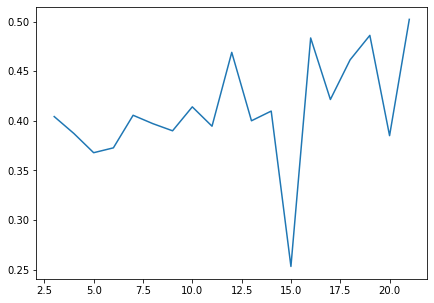

In [14]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(7,5))    
ax.plot(range(3,22),sscores)
plt.show()